In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Lendo os dados do Kaggle

In [4]:
train = pd.read_excel('covid19_dataset.xlsx',sheet_name='All',index_col=0)

In [5]:
train.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5644 entries, 44477f75e8169d2 to 2697fdccbfeb7f7
Columns: 110 entries, Patient age quantile to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(36)
memory usage: 4.8+ MB


In [4]:
train.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


In [5]:
train.dtypes.value_counts()

float64    70
object     36
int64       4
dtype: int64

In [20]:
numerical = train.select_dtypes(include=[np.number])
numerical.isnull().sum().head(40)

#Consegui ver quais são os testes que tem menos nulos, agora preciso ver se esses testes são aplicados nas mesmas pessoas


Patient age quantile                                        0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinophils                                              5042
Mean corpuscular volume (MCV)                            5042
Monocyte

In [7]:
categorical = train.select_dtypes(include=['object'])
categorical.isnull().sum()

#Assim eu consigo ver quais testes são feitos juntos, posso dropar os de urina, influenza A e B Rapid Test e Strepto A

SARS-Cov-2 exam result            0
Respiratory Syncytial Virus    4290
Influenza A                    4290
Influenza B                    4290
Parainfluenza 1                4292
CoronavirusNL63                4292
Rhinovirus/Enterovirus         4292
Coronavirus HKU1               4292
Parainfluenza 3                4292
Chlamydophila pneumoniae       4292
Adenovirus                     4292
Parainfluenza 4                4292
Coronavirus229E                4292
CoronavirusOC43                4292
Inf A H1N1 2009                4292
Bordetella pertussis           4292
Metapneumovirus                4292
Parainfluenza 2                4292
Influenza B, rapid test        4824
Influenza A, rapid test        4824
Strepto A                      5312
Urine - Esterase               5584
Urine - Aspect                 5574
Urine - pH                     5574
Urine - Hemoglobin             5574
Urine - Bile pigments          5574
Urine - Ketone Bodies          5587
Urine - Nitrite             

In [5]:
positives = train[train['SARS-Cov-2 exam result']=='positive']['SARS-Cov-2 exam result']
positives.count()

558

In [6]:
#Ver todas as colunas e diminuir casas decimais

pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 3)

In [7]:
train.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.237,-0.022,-0.517,0.011,0.102,0.318,-0.951,-0.095,-0.224,-0.292,1.482,0.166,0.358,-0.625,-0.141,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619,1.198,-0.148,2.09,-0.306,0.863,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
#Análise Exploratória

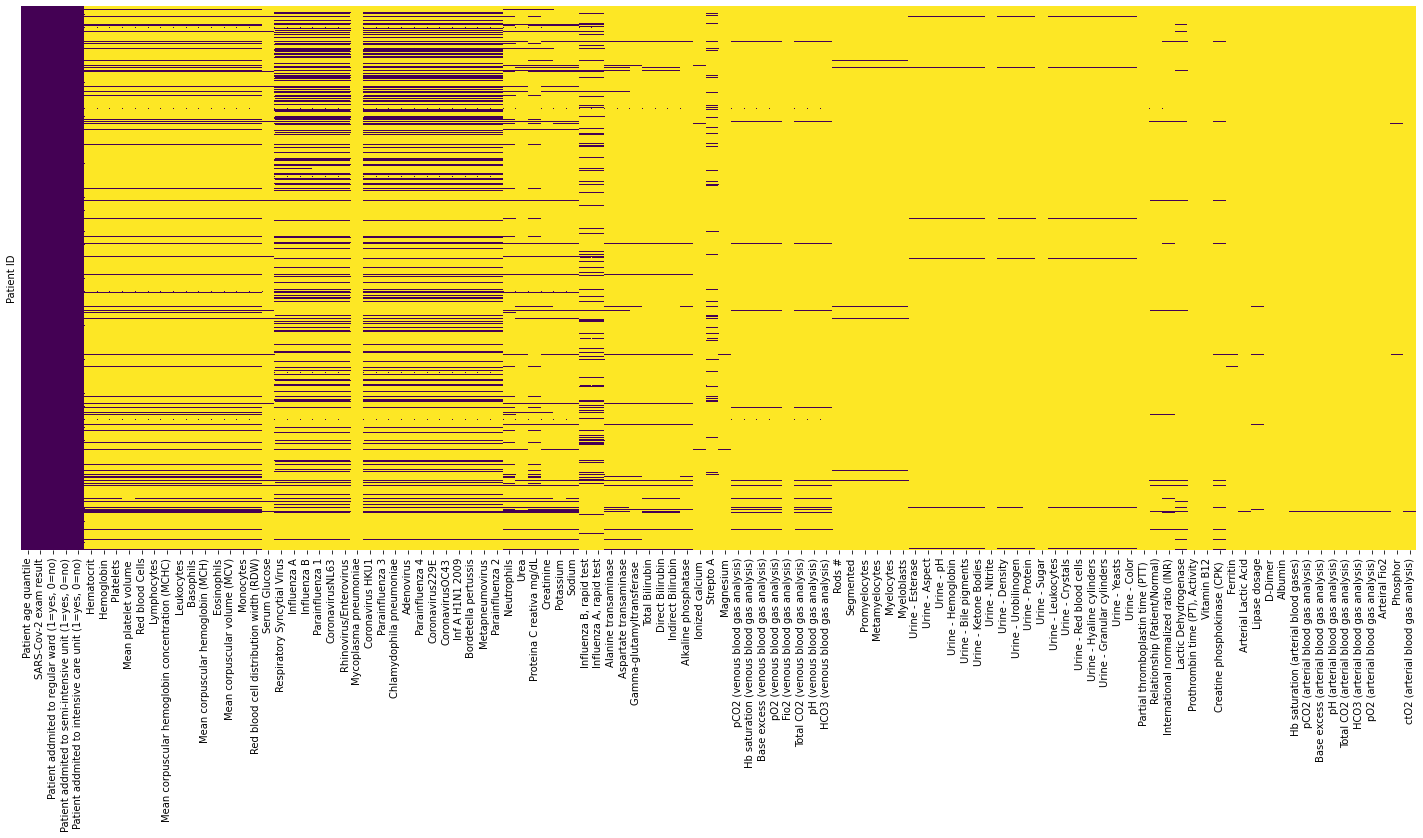

In [194]:
plt.figure(figsize=(25,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [198]:
#Avaliando se os que são positivos possuem mais informação

positives = train[train['SARS-Cov-2 exam result']=='positive']
positives.isnull().sum()

Patient age quantile                                       0
SARS-Cov-2 exam result                                     0
Patient addmited to regular ward (1=yes, 0=no)             0
Patient addmited to semi-intensive unit (1=yes, 0=no)      0
Patient addmited to intensive care unit (1=yes, 0=no)      0
Hematocrit                                               475
Hemoglobin                                               475
Platelets                                                475
Mean platelet volume                                     477
Red blood Cells                                          475
Lymphocytes                                              475
Mean corpuscular hemoglobin concentration (MCHC)         475
Leukocytes                                               475
Basophils                                                475
Mean corpuscular hemoglobin (MCH)                        475
Eosinophils                                              475
Mean corpuscular volume 

In [209]:
train[train['Patient addmited to intensive care unit (1=yes, 0=no)']==1]['Patient addmited to intensive care unit (1=yes, 0=no)'].count()

41

In [210]:
train[train['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1]['Patient addmited to semi-intensive unit (1=yes, 0=no)'].count()

50

In [214]:
train[train['Patient addmited to regular ward (1=yes, 0=no)']==1]['Patient addmited to regular ward (1=yes, 0=no)'].count()

79

In [222]:
train[(train['Patient addmited to regular ward (1=yes, 0=no)']==0) & (train['Patient addmited to semi-intensive unit (1=yes, 0=no)']==0) & (train['Patient addmited to intensive care unit (1=yes, 0=no)']==0)]['Patient age quantile'].count()

5474

In [215]:
train['Patient age quantile'].count()

5644

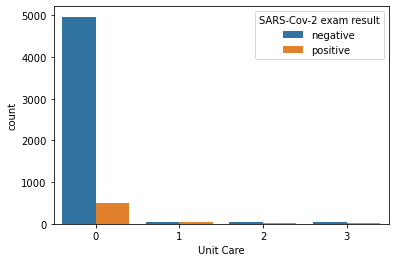

In [235]:
# Colocando em uma coluna única em qual internação o paciente está 
# 0 - None
# 1 - Regular
# 2 - Semi Intensive
# 3 - Intensive

conditions = [(train['Patient addmited to regular ward (1=yes, 0=no)']==1),
             (train['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1),
             (train['Patient addmited to intensive care unit (1=yes, 0=no)']==1),
             (train['Patient addmited to regular ward (1=yes, 0=no)']==0) & (train['Patient addmited to semi-intensive unit (1=yes, 0=no)']==0) & (train['Patient addmited to intensive care unit (1=yes, 0=no)']==0)
             ]
values = [1,2,3,0]

train['Unit Care'] = np.select(conditions,values)

sns.countplot('Unit Care', hue='SARS-Cov-2 exam result', data = train)
                

In [31]:
uti = train[train['Patient addmited to intensive care unit (1=yes, 0=no)']==1]

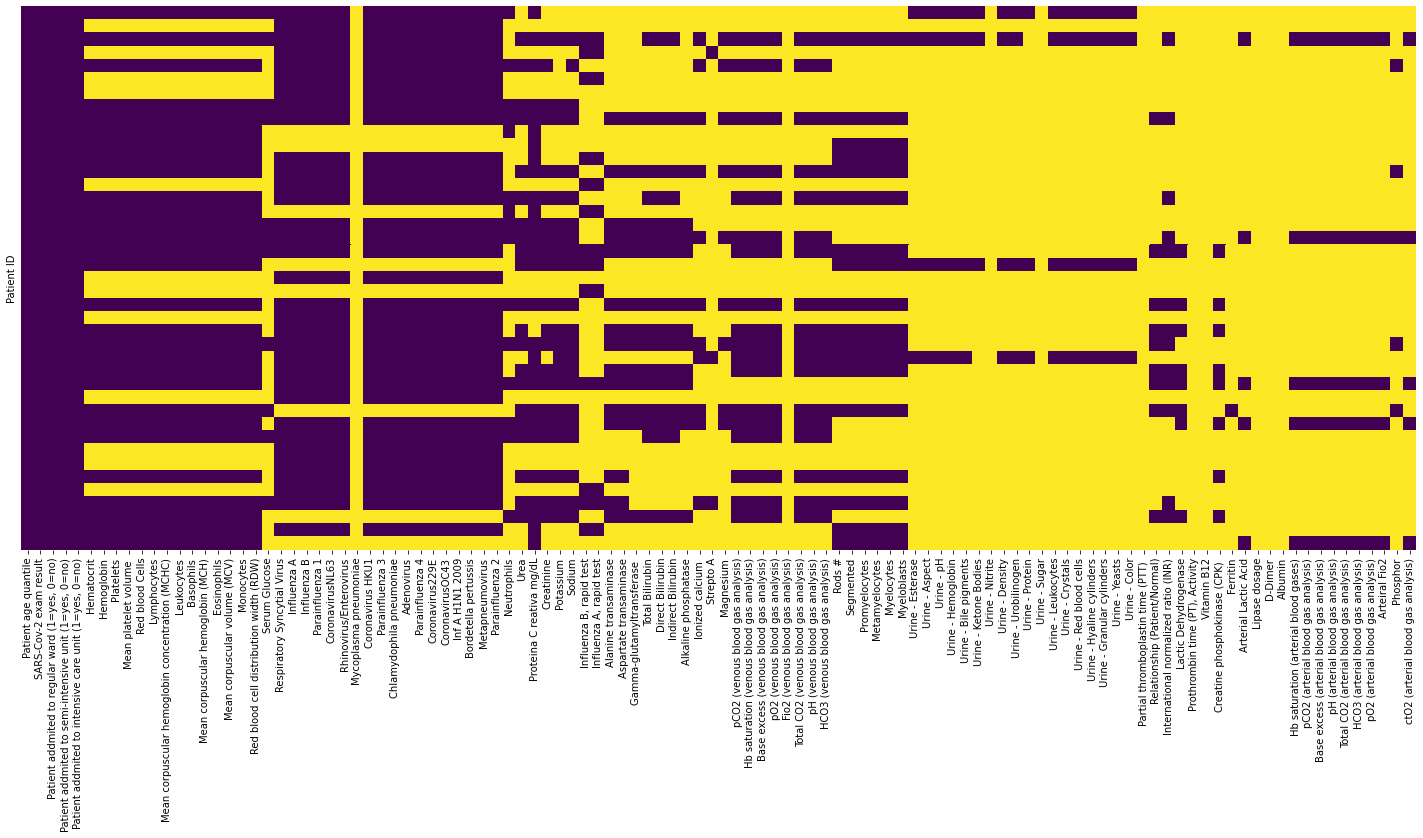

In [33]:
plt.figure(figsize=(25,10))
sns.heatmap(uti.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
regular = train[train['Patient addmited to regular ward (1=yes, 0=no)']==1]

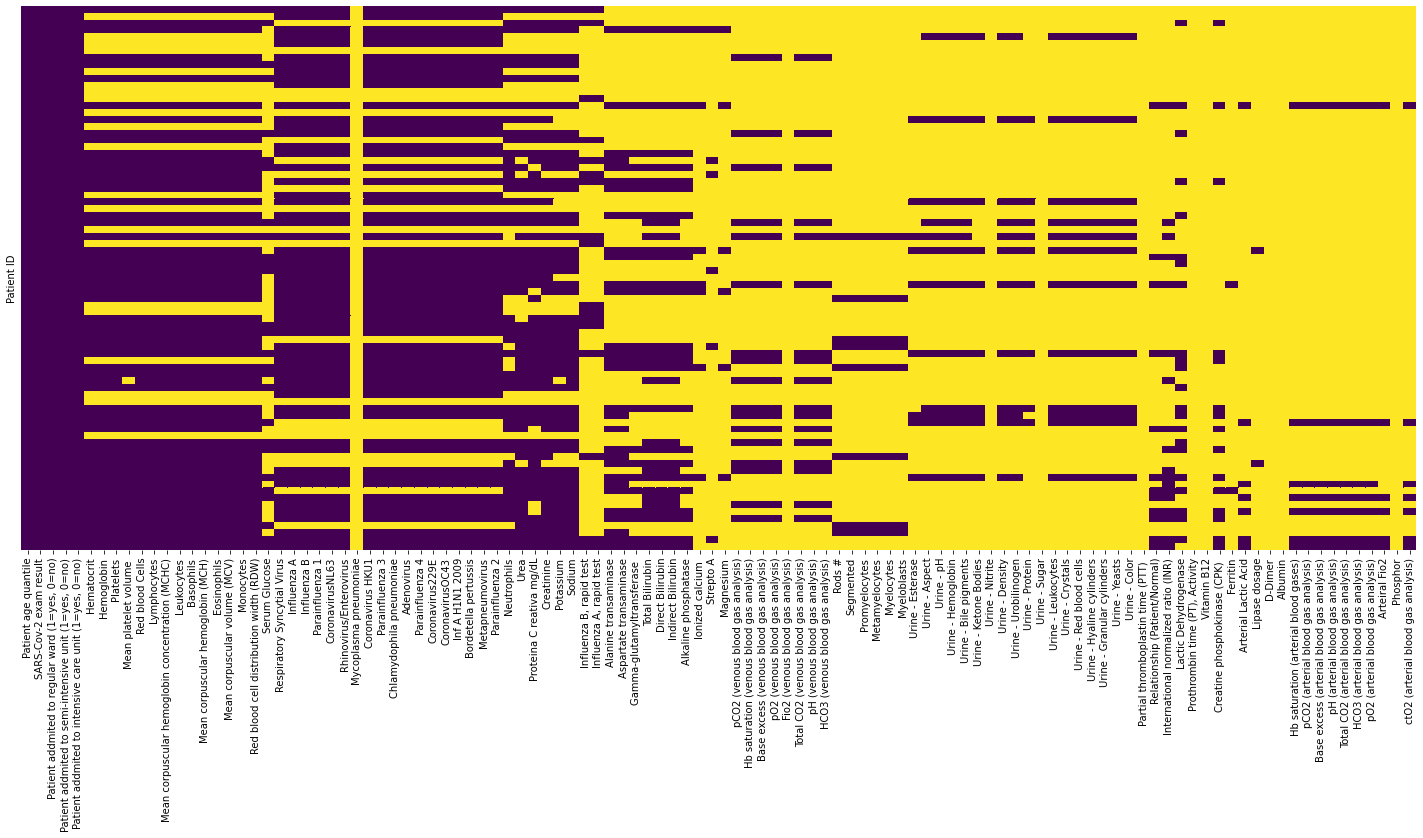

In [37]:
plt.figure(figsize=(25,10))
sns.heatmap(regular.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
semi = train[train['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1]

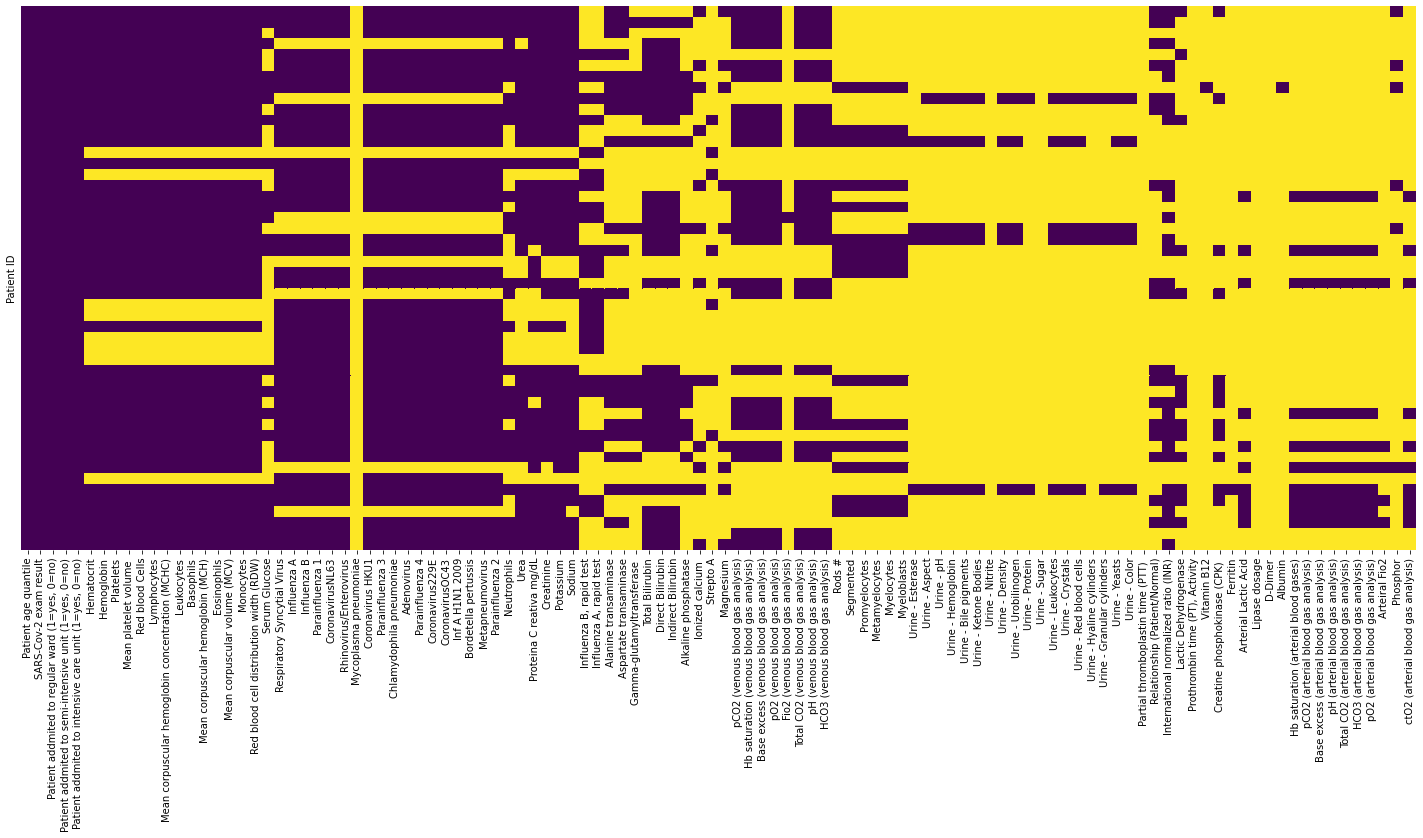

In [38]:
plt.figure(figsize=(25,10))
sns.heatmap(semi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

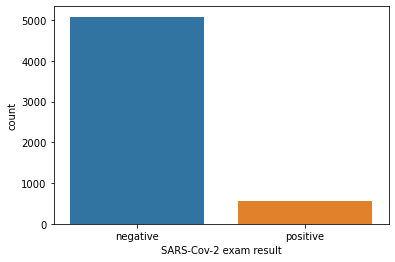

In [43]:
sns.countplot(x='SARS-Cov-2 exam result',data=train)

In [75]:
percent_missing = train.isnull().sum() * 100 / len(train)

In [76]:
percent_missing_50 = percent_missing>50

In [80]:
percent_missing_50

Patient age quantile                                     False
SARS-Cov-2 exam result                                   False
Patient addmited to regular ward (1=yes, 0=no)           False
Patient addmited to semi-intensive unit (1=yes, 0=no)    False
Patient addmited to intensive care unit (1=yes, 0=no)    False
                                                         ...  
HCO3 (arterial blood gas analysis)                        True
pO2 (arterial blood gas analysis)                         True
Arteiral Fio2                                             True
Phosphor                                                  True
ctO2 (arterial blood gas analysis)                        True
Length: 110, dtype: bool

In [87]:
def boolstr_to_floatstr(v):
    if v == 'True':
        return '1'
    elif v == 'False':
        return '0'
    else:
        return v

In [88]:
new_percent_missing_50 = np.vectorize(boolstr_to_floatstr)(percent_missing_50).astype(float)

(array([  5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 105.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

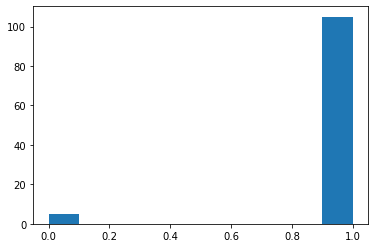

In [91]:
plt.hist(new_percent_missing_50)

In [106]:
data = percent_missing_50.to_frame(name='Dados')

In [110]:
data

,Dados
Patient age quantile,False
SARS-Cov-2 exam result,False
"Patient addmited to regular ward (1=yes, 0=no)",False
"Patient addmited to semi-intensive unit (1=yes, 0=no)",False
"Patient addmited to intensive care unit (1=yes, 0=no)",False
...,...
HCO3 (arterial blood gas analysis),True
pO2 (arterial blood gas analysis),True
Arteiral Fio2,True
Phosphor,True


In [160]:
pd.set_option("display.max.rows", None)
data_true = data[data['Dados']==True]
data_true

,Dados
Hematocrit,True
Hemoglobin,True
Platelets,True
Mean platelet volume,True
Red blood Cells,True
Lymphocytes,True
Mean corpuscular hemoglobin concentration (MCHC),True
Leukocytes,True
Basophils,True
Mean corpuscular hemoglobin (MCH),True


In [161]:
data_true.count()

Dados    105
dtype: int64

In [162]:
data_t = data_true.transpose()
data_t

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Dados,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [163]:
serie = data_t.columns
serie

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=105)

In [185]:
def drop_info(df,serie):
    new_train = df
    for column in df:
        if column in serie:
            new_train.drop(column,axis=1, inplace=True)  
    return new_train

In [186]:
new_train = drop_info(train,serie)

In [187]:
new_train

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
Patient ID,,,,,
44477f75e8169d2,13,negative,0,0,0
126e9dd13932f68,17,negative,0,0,0
a46b4402a0e5696,8,negative,0,0,0
f7d619a94f97c45,5,negative,0,0,0
d9e41465789c2b5,15,negative,0,0,0
75f16746216c4d1,9,negative,0,0,0
2a2245e360808d7,13,negative,0,0,0
509197ec73f1400,16,negative,0,0,0
8bb9d64f0215244,1,negative,0,1,0
